In [1]:
#importing necessary libraries and packages
import numpy as np 
import pandas as pd 

#read the csv file through pandas -read_csv
df = pd.read_csv('testing.csv', error_bad_lines=False)

#to find the dimension of the dataframe
df.shape

#removing all the unneccesary columns
df_new = df.drop(['word','polarity','strength','sense','written_form','part_of_speech','confidence','lemgram','lemgram_frequency','lemma_frequency'], axis = 1)

#renaming the column name for easy understanding
df_new.rename({"example": "Emails"}, axis='columns', inplace =True)

#Due to removinf unneccesary columns, some unnamed columns are formed- for deleting those 
df_new = df_new.loc[:, ~df_new.columns.str.contains('^Unnamed')]

#remove the NaN values in the dataframe
df_new = df_new[df_new['Emails'].notna()]

In [2]:
# add new data different language
new_row = {'Emails':'un deux trois'}

df_new = df_new.append(new_row, ignore_index=True)

# add new data with link
new_row = {'Emails':'Klicka på https://www.linkedin.com/feed/?trk=guest_homepage-basic_nav-header-signin'}

df_new = df_new.append(new_row, ignore_index=True)

In [3]:
df_old_version = df_new.copy()

In [4]:
#eliminating any links from the email information/column
import re
def excludeLinks(text):
    regex_urllinks = "https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]+\.[a-zA-Z0-9()]+\/[a-zA-Z0-9]*\/*[\?\-\!]*[a-zA-Z0-9\=\_\-]*"
    regex_emailIDs = "[A-Za-z0-9]+\@[a-zA-Z]+\.[a-zA-Z]+"
    savedResponse = re.search(regex_urllinks,text)
    if re.search(regex_urllinks,text) == None:
        pass
    else:
        return text.replace(savedResponse.group(),'')

for indx in df_old_version.index:
    response = excludeLinks(str(df_old_version['Emails'][indx]))
    if response == None:
        pass
    else:
        df_old_version['Emails'][indx] = response
df_old_version

,Emails
0,Dessemellan ligger en lång och luguber period ...
1,Han var tydligt överraskad av frågan .
2,Protestdemonstrationerna har förenat yttersta ...
3,Utspelet kan ytterligare fördystra de redan sp...
4,Den beräknande Gauguin insåg att det var något...
...,...
1977,Mellan St : a Birgittas kapell och Sjömagasine...
1978,"Om affären kring paragraf 152 har , enligt mån..."
1979,"Shetlandsponnyn är en urstark , timid , vänlig..."
1980,un deux trois


In [5]:
###SPAM 
from langdetect import detect

def detectLanguage(text):
    return detect(text)

badwords = ['och',
 'med','..','\xa0']
df_old_version['Labels'] = ''

def words_in_string(word_list, a_string):
    return set(word_list).intersection(a_string.split()) 


for indx in df_old_version.index:
    each_email = df_old_version.Emails[indx]
    if detectLanguage(each_email) == 'sv':
        emaillang = 'swedish'
    else:
        emaillang = 'other'
    
    if emaillang == 'other' or words_in_string(badwords, each_email) != set():
        df_old_version['Labels'][indx] = 'SPAM'        
    else:
        df_old_version['Labels'][indx] = 'HAM'
df_old_version

,Emails,Labels
0,Dessemellan ligger en lång och luguber period ...,SPAM
1,Han var tydligt överraskad av frågan .,HAM
2,Protestdemonstrationerna har förenat yttersta ...,SPAM
3,Utspelet kan ytterligare fördystra de redan sp...,SPAM
4,Den beräknande Gauguin insåg att det var något...,HAM
...,...,...
1977,Mellan St : a Birgittas kapell och Sjömagasine...,SPAM
1978,"Om affären kring paragraf 152 har , enligt mån...",HAM
1979,"Shetlandsponnyn är en urstark , timid , vänlig...",SPAM
1980,un deux trois,SPAM


In [6]:
df_supervised = df_old_version.copy()
df_supervised

,Emails,Labels
0,Dessemellan ligger en lång och luguber period ...,SPAM
1,Han var tydligt överraskad av frågan .,HAM
2,Protestdemonstrationerna har förenat yttersta ...,SPAM
3,Utspelet kan ytterligare fördystra de redan sp...,SPAM
4,Den beräknande Gauguin insåg att det var något...,HAM
...,...,...
1977,Mellan St : a Birgittas kapell och Sjömagasine...,SPAM
1978,"Om affären kring paragraf 152 har , enligt mån...",HAM
1979,"Shetlandsponnyn är en urstark , timid , vänlig...",SPAM
1980,un deux trois,SPAM


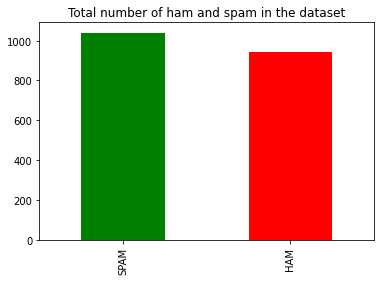

In [7]:
import matplotlib.pyplot as plt
df_supervised['Labels'].value_counts().plot.bar(color = ["g","r"])
plt.title('Total number of ham and spam in the dataset')
plt.show()

In [8]:
##Count Vectorizer -> Convert document/sentence into matrix (Row-> each sentence, Column-> Tokens(Word))
####sklearn -> feature_extraction
from sklearn.feature_extraction.text import CountVectorizer
countVec = CountVectorizer(max_features = 500)
data_count = countVec.fit_transform(df_supervised['Emails'][0:5])
data_count.toarray()
countVec.get_feature_names()

['allmän',
 'amerikanska',
 'annat',
 'antirobotförsvar',
 'att',
 'av',
 'beräknande',
 'bilar',
 'bland',
 'brännande',
 'de',
 'den',
 'dessemellan',
 'det',
 'emot',
 'en',
 'ett',
 'europa',
 'fackföreningsrörelsen',
 'frågan',
 'från',
 'förbittrad',
 'fördystra',
 'förenat',
 'gatudemonstrationer',
 'gauguin',
 'han',
 'har',
 'ibland',
 'insåg',
 'kan',
 'ligger',
 'luguber',
 'lydparti',
 'lång',
 'med',
 'moskvaregeringen',
 'något',
 'och',
 'oppositionspartierna',
 'parlamentet',
 'period',
 'polen',
 'protestdemonstrationerna',
 'radaranläggningar',
 'redan',
 'relationerna',
 'robotar',
 'rysk',
 'saknades',
 'serie',
 'som',
 'spända',
 'stalinistiskt',
 'starkt',
 'studentrörelsen',
 'söderhavet',
 'tal',
 'till',
 'tjeckien',
 'traditionella',
 'tydligt',
 'urartade',
 'usa',
 'utbyggnad',
 'utspelet',
 'vandalism',
 'var',
 'vänstern',
 'ytterligare',
 'yttersta',
 'är',
 'åtgärder',
 'östra',
 'överraskad']

In [9]:
#preprocessing steps, importing necessary packages
#nltk for stopwords
from nltk.corpus import stopwords
#mentioning "swedish" for specific language stopwords
cachedStopWords = stopwords.words("swedish")
cachedStopWordsEN = stopwords.words("english")
#word_tokenize for spliting words from a sentence
from nltk.tokenize import word_tokenize
#stemming package
# from nltk.stem import PorterStemmer
# ps = PorterStemmer()

#snowball stemmer
# from nltk.stem.snowball import SnowballStemmer
# snow_stemmer = SnowballStemmer(language='swedish')

#lancaster stemmer
from nltk.stem import LancasterStemmer
lancaster=LancasterStemmer()

#function to convert the text to Lower case to have the entire text at one level.
def convertTolower(text):
    return text.lower()

#function to remove the stopwords(swedish) from the text and return a processed string(text)
def removestopwords(text):
    lst = []
    for word in text.split():
        if word in cachedStopWords or word in cachedStopWordsEN:
            pass
        else:
            lst.append(word)
    text = ' '.join(lst)
    
#     res1 = [':' if word in cachedStopWords or word in cachedStopWordsEN else word for word in text.split()]
    return text

#Remove the punctuations as they will not impact any Insight knowledge
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
def removePunctuations(text):
    for i in symbols:
        text = np.char.replace(text, i, ' ')
    return text

#removing apostrophe to read the text only
def removeApostrophe(text):
    return np.char.replace(text, "'", "")

#remove the single length word in a text, if necessary to remove
def removeSingleChar(text):
    nlst = []
    words = word_tokenize(text)
    for word in words:
        if len(word) > 2:
            nlst.append(word)
    return ' '.join(nlst)

# def singlecharSentence(text):
#     if len(text) < 1:
#         return text

#function to perform stemming, Stemming will bring the word to its root form e.g: "Running" -> "Run"
# def stem(text):
#     nlst = []
#     words = word_tokenize(text)
#     for word in words:
#         nlst.append(lancaster.stem(word))
#     return ' '.join(nlst)

In [10]:
#perform Preprocessing steps, utilising the above functions(methods)
email_lst = df_supervised['Emails']
EmailLst = []
df_supervised['CleanedEmails'] = ''
for ind in df_supervised.index:
    i = df_supervised['Emails'][ind]
    i = convertTolower(str(i))
    i = removestopwords(str(i))
    i = removePunctuations(str(i))
    i = removeApostrophe(str(i))
    i = removeSingleChar(str(i))
#     i = stem(str(i))
    #here created a new column for simplicity
    df_supervised['CleanedEmails'][ind] = i
df_supervised

,Emails,Labels,CleanedEmails
0,Dessemellan ligger en lång och luguber period ...,SPAM,dessemellan ligger lång luguber period stalini...
1,Han var tydligt överraskad av frågan .,HAM,tydligt överraskad frågan
2,Protestdemonstrationerna har förenat yttersta ...,SPAM,protestdemonstrationerna förenat yttersta väns...
3,Utspelet kan ytterligare fördystra de redan sp...,SPAM,utspelet ytterligare fördystra redan spända ry...
4,Den beräknande Gauguin insåg att det var något...,HAM,beräknande gauguin insåg saknades söderhavet
...,...,...,...
1977,Mellan St : a Birgittas kapell och Sjömagasine...,SPAM,birgittas kapell sjömagasinet ligger stor vack...
1978,"Om affären kring paragraf 152 har , enligt mån...",HAM,affären kring paragraf 152 enligt många öppnat...
1979,"Shetlandsponnyn är en urstark , timid , vänlig...",SPAM,shetlandsponnyn urstark timid vänlig enormt vi...
1980,un deux trois,SPAM,deux trois


In [11]:
# from sklearn.feature_extraction.text import CountVectorizer
# countvect = CountVectorizer(max_features =500)
# data_count = countvect.fit_transform(df_supervised['CleanedEmails'][:10])
# data_count.toarray()
# df_supervised['CleanedEmails'][:10]
# countvect.get_feature_names()

['allmän',
 'ambassadör',
 'amerikanska',
 'annat',
 'antirobotförsvar',
 'avsikten',
 'bagageutrymme',
 'bakom',
 'beräknande',
 'berättar',
 'besviken',
 'bilar',
 'bland',
 'blue',
 'brännande',
 'dessemellan',
 'djupt',
 'dopningstest',
 'dum',
 'dumt',
 'därför',
 'elak',
 'emot',
 'engelske',
 'erkänner',
 'europa',
 'fackföreningsrörelsen',
 'ferdinand',
 'flesta',
 'flygplanets',
 'fotboll',
 'frågan',
 'färd',
 'följde',
 'förbittrad',
 'fördystra',
 'förenat',
 'förkylning',
 'gatudemonstrationer',
 'gauguin',
 'gjorde',
 'greenstock',
 'gått',
 'hamas',
 'hjälp',
 'hävdade',
 'ibland',
 'inadekvat',
 'insåg',
 'intog',
 'intygar',
 'islamistiska',
 'israels',
 'jenny',
 'jeremy',
 'jet',
 'judiska',
 'kallade',
 'krossa',
 'lagt',
 'landslagsbacken',
 'lasta',
 'ledde',
 'ligger',
 'luftrören',
 'luguber',
 'lydparti',
 'läkare',
 'lång',
 'minsta',
 'missa',
 'misstag',
 'moskvaregeringen',
 'motståndet',
 'mål',
 'månader',
 'ner',
 'new',
 'olyckligtvis',
 'omedelbart',
 

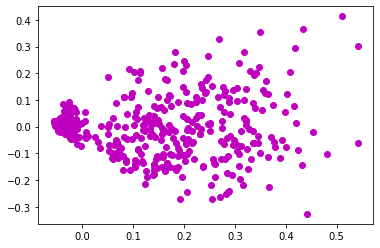

In [12]:
#Performing TFIDF in order to generate a scatter plot for the text vectors
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
#for dimension reduction or for visualization is utilise PCA(Principal Component Analysis)
from sklearn.decomposition import PCA

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_supervised.CleanedEmails)
X_dense = X.todense()
coords=  PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:,0], coords[:,1], c='m')
plt.show()

In [13]:
# #build a WORD CLOUD for the sentences that are a part of processed dataframe!
# #importing all packages, libraries necessary for this
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud

# #123 is taken as a random number for instance, you can visualise by changing this number as well
# # text = df_cleaned['NewEmails'][123] # the input of the wordcloud generator

# unwanted_words = ['kalla', 'både']
# bunchOfEmails = list(df_supervised['CleanedEmails']) 
# combined_emails = '.'.join(bunchOfEmails)
# combined_emails

'dessemellan ligger lång luguber period stalinistiskt lydparti.tydligt överraskad frågan.protestdemonstrationerna förenat yttersta vänstern studentrörelsen fackföreningsrörelsen traditionella oppositionspartierna förbittrad serie åtgärder gatudemonstrationer ibland urartade brännande bilar allmän vandalism tal parlamentet.utspelet ytterligare fördystra redan spända rysk amerikanska relationerna moskvaregeringen starkt emot usa utbyggnad antirobotförsvar östra europa bland annat robotar polen radaranläggningar tjeckien.beräknande gauguin insåg saknades söderhavet.islamistiska rörelsen hamas ligger bakom flesta självmordsbombningarna judiska mål underkände omedelbart israels plan hävdade avsikten krossa palestinska motståndet.färd lasta jet blue plan new york somnade olyckligtvis flygplanets bagageutrymme därför följde resan.storbritanniens ambassadör sir jeremy greenstock intog ståndpunkt usa kallade rapporten inadekvat djupt besviken.dum gjorde misstag fotboll engelske landslagsbacken 

In [14]:
newLst = []
# print(df_cleaned.index)
for indx in df_supervised.index[:10]:
#     print(indx,df_cleaned['NewEmails'][indx])
# for eachEmail in range(0,10):  # va gör rangen 0-5 här?
    text = df_supervised['CleanedEmails'][indx]
    newLst.append(text)
combined_emails1 = '.'.join(newLst)
combined_emails1

'dessemellan ligger lång luguber period stalinistiskt lydparti.tydligt överraskad frågan.protestdemonstrationerna förenat yttersta vänstern studentrörelsen fackföreningsrörelsen traditionella oppositionspartierna förbittrad serie åtgärder gatudemonstrationer ibland urartade brännande bilar allmän vandalism tal parlamentet.utspelet ytterligare fördystra redan spända rysk amerikanska relationerna moskvaregeringen starkt emot usa utbyggnad antirobotförsvar östra europa bland annat robotar polen radaranläggningar tjeckien.beräknande gauguin insåg saknades söderhavet.islamistiska rörelsen hamas ligger bakom flesta självmordsbombningarna judiska mål underkände omedelbart israels plan hävdade avsikten krossa palestinska motståndet.färd lasta jet blue plan new york somnade olyckligtvis flygplanets bagageutrymme därför följde resan.storbritanniens ambassadör sir jeremy greenstock intog ståndpunkt usa kallade rapporten inadekvat djupt besviken.dum gjorde misstag fotboll engelske landslagsbacken 

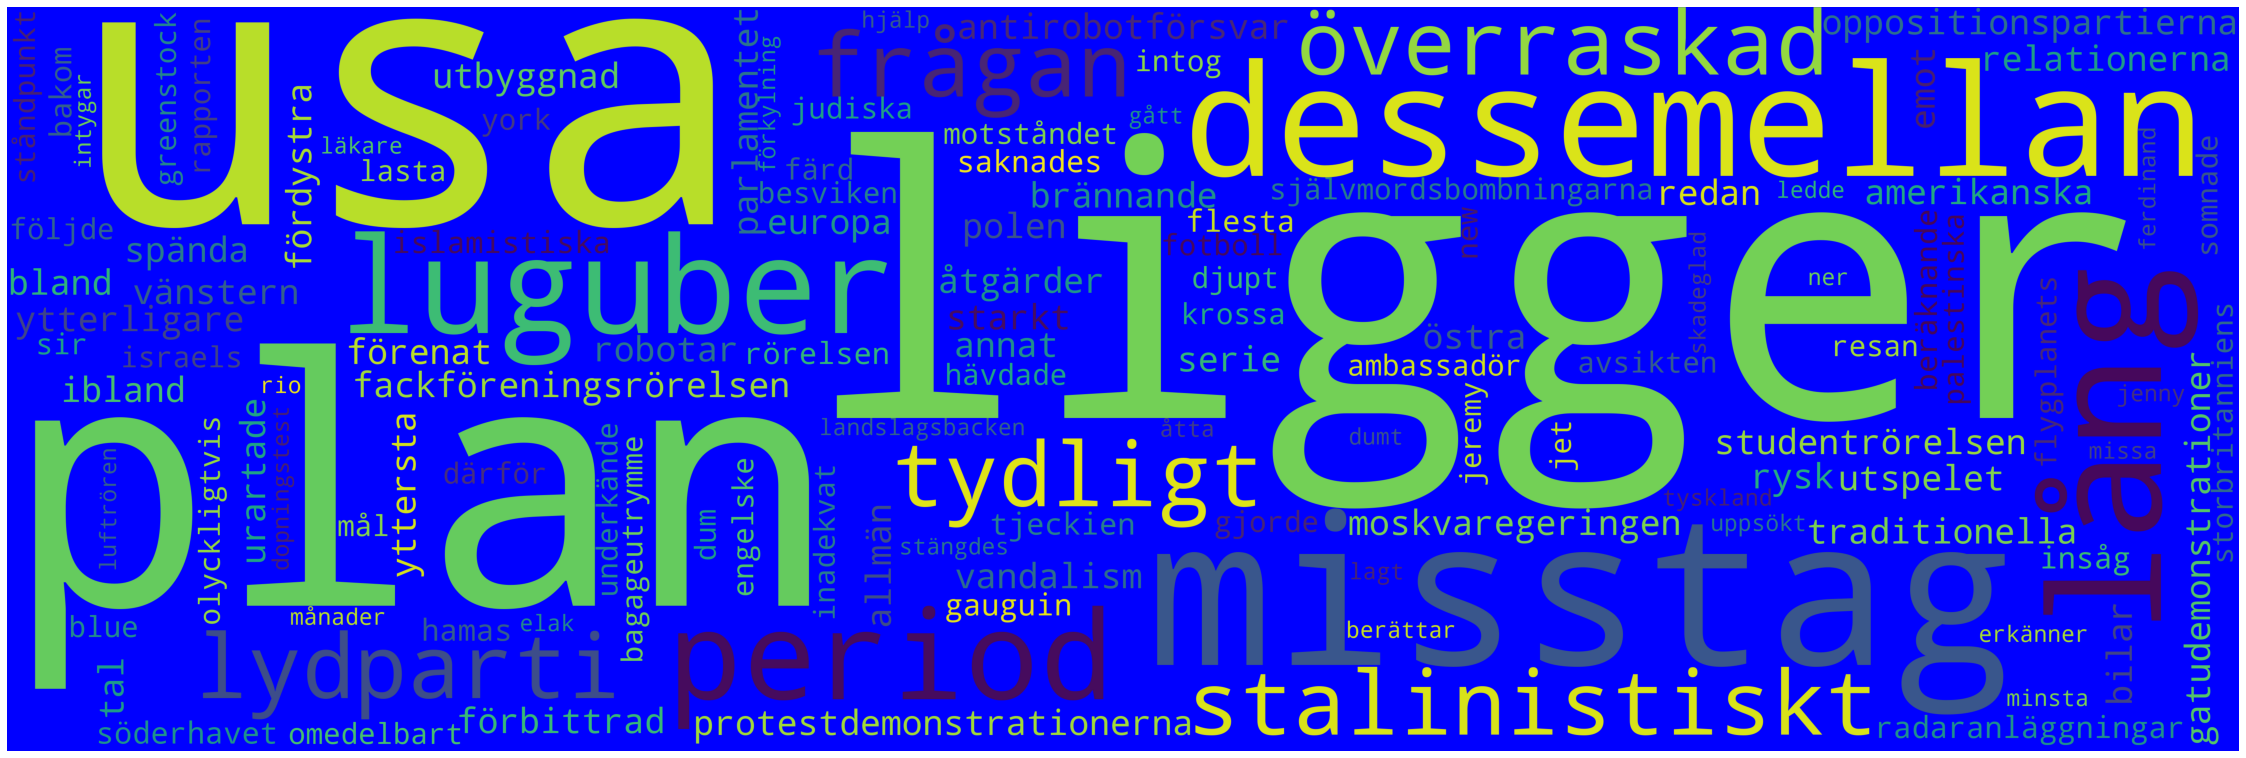

In [15]:
text = combined_emails1
lst = []
for i in unwanted_words:
    text = text.replace(i,'')

#generate a word cloud from the above text
wordcloud = WordCloud(width = 6000, height = 2000, random_state=1, background_color='blue', collocations=False, stopwords = cachedStopWords).generate(text)

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

[{'text': 'dessemellan ligger lång luguber period stalinistiskt lydparti', 'color': 'r', 'cluster': 1}, {'text': 'tydligt överraskad frågan', 'color': 'r', 'cluster': 1}, {'text': 'protestdemonstrationerna förenat yttersta vänstern studentrörelsen fackföreningsrörelsen traditionella oppositionspartierna förbittrad serie åtgärder gatudemonstrationer ibland urartade brännande bilar allmän vandalism tal parlamentet', 'color': 'c', 'cluster': 2}, {'text': 'utspelet ytterligare fördystra redan spända rysk amerikanska relationerna moskvaregeringen starkt emot usa utbyggnad antirobotförsvar östra europa bland annat robotar polen radaranläggningar tjeckien', 'color': 'b', 'cluster': 3}, {'text': 'beräknande gauguin insåg saknades söderhavet', 'color': 'r', 'cluster': 1}, {'text': 'islamistiska rörelsen hamas ligger bakom flesta självmordsbombningarna judiska mål underkände omedelbart israels plan hävdade avsikten krossa palestinska motståndet', 'color': 'r', 'cluster': 1}, {'text': 'färd lasta

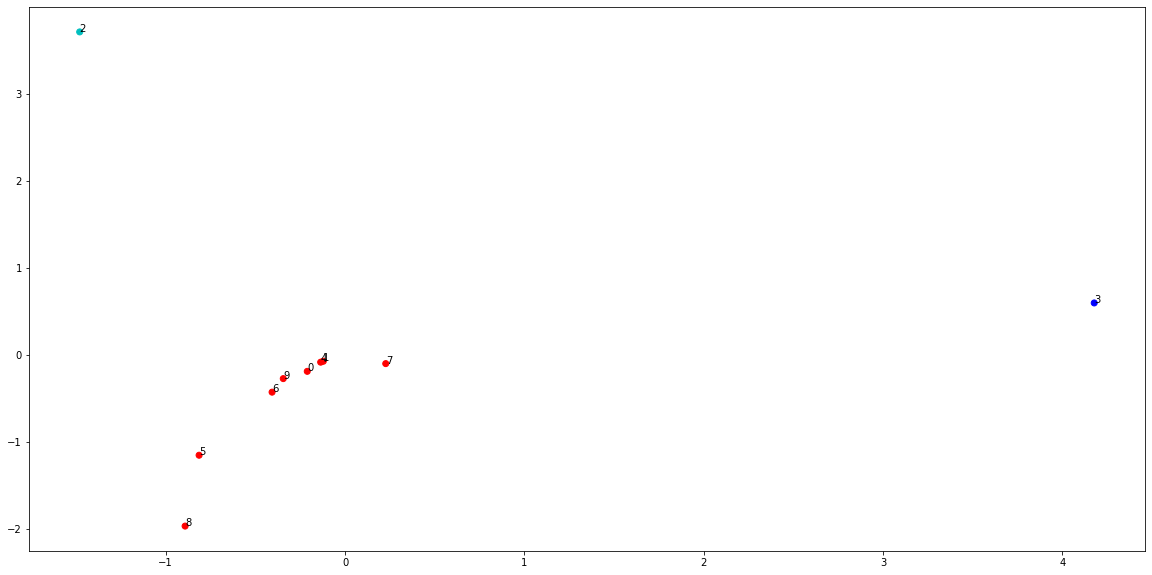

In [17]:
#Generate sentence similsarity for building Insights on how similar the sentences looks like.
import re
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

x = []
#here I mentioned [:10] to consider a small test case for visualisation
for i in df_supervised['CleanedEmails'][:10]:
    x.append(i)

cv = CountVectorizer(analyzer = 'word', max_features = 5000)  
vectors = cv.fit_transform(x)
#used K-means clustering algorithm for visualising how scatter the sentences/mails are: COnsidered 5 clusters(you can choose any number)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmean_indices = kmeans.fit_predict(vectors)


pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

# colors = ["r", "b", "c", "y", "m" ]
colors = ["r", "b", "c"]


x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])


result_colors = [colors[d] for d in kmean_indices]
# lst = []

def cluster(result_colors1):
        if result_colors1 == 'r':
            cluster = 1
        elif result_colors1 == 'c':
            cluster = 2
        else:
            cluster = 3
        return cluster
    
lst = []
dicT = {}
for i, txt in enumerate(x):
#     print(i,result_colors[i])
    ax.annotate(i, (x_axis[i], y_axis[i]))
    dicT['text'] = txt
    dicT['color'] = result_colors[i]
    dicT['cluster'] = cluster(result_colors[i])
    lst.append(dicT)
    dicT = {}
print(lst)
    